In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/human-resources-data-set/HRDataset_v13.csv


## Purpose of this document

The aim of this notebook is to explore an HR dataset to see what relationships exist between different characteristics of employees and their work experience. 

The first part of this notebook will focus on importing, cleaning and exploring the dataset.

## 1. Getting the data

In [42]:
# import the csv as a pandas dataframe
df = pd.read_csv('/kaggle/input/human-resources-data-set/HRDataset_v13.csv', )
df = pd.DataFrame(df)
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


In [43]:
# Understand the shape of our dataset. i.e. how many employees and attributes do we have?
print(df.shape)

(401, 35)


In [44]:
#Check to see if there are any null values
missingval = (df.isnull().sum())
print(missingval[missingval > 0])

Employee_Name                  91
EmpID                          91
MarriedID                      91
MaritalStatusID                91
GenderID                       91
EmpStatusID                    91
DeptID                         91
PerfScoreID                    91
FromDiversityJobFairID         91
PayRate                        91
Termd                          91
PositionID                     91
Position                       91
State                          91
Zip                            91
DOB                            91
Sex                            91
MaritalDesc                    91
CitizenDesc                    91
HispanicLatino                 91
RaceDesc                       91
DateofHire                     91
DateofTermination             298
TermReason                     92
EmploymentStatus               91
Department                     91
ManagerName                    91
ManagerID                      99
RecruitmentSource              91
PerformanceSco

In [45]:
#The above established that there were a significant number of null values. 
#By comparing the shape of the dataset with the documentation, we can see that there are 91 empty rows.
#Drop these empty rows.
df2 = df.drop(df.index[310:401])
df2.shape

(310, 35)

In [46]:
#How is our data stored? This will impact the types of exploration and analysis we can run. 
print(df2.dtypes)

Employee_Name                  object
EmpID                         float64
MarriedID                     float64
MaritalStatusID               float64
GenderID                      float64
EmpStatusID                   float64
DeptID                        float64
PerfScoreID                   float64
FromDiversityJobFairID        float64
PayRate                       float64
Termd                         float64
PositionID                    float64
Position                       object
State                          object
Zip                           float64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

In [47]:
#Lets get an overview of the relationships between each of the attributes.
#This will help us to narrow down our research questions and hypotheses. 
df2.corr()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30
EmpID,1.000000,0.034146,0.112300,0.000119,-0.038664,0.192228,-0.019210,0.049055,-0.020310,-0.035483,0.007435,0.130735,0.045432,-0.005720,-0.017726,-0.171329,NaN
MarriedID,0.034146,1.000000,0.163655,-0.023593,0.089000,-0.125659,-0.045959,-0.011468,0.026342,0.071844,-0.028783,-0.040212,-0.092960,0.019149,-0.126980,0.056748,NaN
MaritalStatusID,0.112300,0.163655,1.000000,-0.025479,0.115255,0.011966,0.047773,0.041335,-0.082459,0.098774,0.021703,0.010792,0.023278,0.021298,0.001990,-0.051893,NaN
GenderID,0.000119,-0.023593,-0.025479,1.000000,-0.024618,-0.046189,-0.054915,0.034872,0.136151,-0.016471,-0.075992,0.051408,-0.031737,-0.037021,-0.053138,0.089131,NaN
EmpStatusID,-0.038664,0.089000,0.115255,-0.024618,1.000000,0.092266,-0.081250,0.188436,-0.214835,0.955596,0.222350,-0.151348,0.233673,-0.002734,0.010866,-0.163831,NaN
DeptID,0.192228,-0.125659,0.011966,-0.046189,0.092266,1.000000,-0.072365,-0.129035,-0.202810,0.060433,0.028941,0.291917,0.553184,-0.036522,0.031583,-0.791258,NaN
PerfScoreID,-0.019210,-0.045959,0.047773,-0.054915,-0.081250,-0.072365,1.000000,0.008993,0.020695,-0.099112,0.009172,-0.062361,-0.065306,0.056095,0.310654,0.059719,NaN
FromDiversityJobFairID,0.049055,-0.011468,0.041335,0.034872,0.188436,-0.129035,0.008993,1.000000,-0.053474,0.149683,0.015449,-0.028592,0.007229,-0.113663,-0.034350,0.032642,NaN
PayRate,-0.020310,0.026342,-0.082459,0.136151,-0.214835,-0.202810,0.020695,-0.053474,1.000000,-0.196583,-0.383827,0.391945,-0.397964,-0.024223,0.061525,0.448484,NaN
Termd,-0.035483,0.071844,0.098774,-0.016471,0.955596,0.060433,-0.099112,0.149683,-0.196583,1.000000,0.163572,-0.138353,0.203496,-0.002051,-0.012829,-0.141731,NaN


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Research Questions:
1. Is there a gender dimension that affects pay rates and performance ratings?
2. Does manager ID impact retention rates?


## RQ1: Impact of Gender on pay and performance ratings.

In [49]:
# First, lets explore the data.
df2['PayRate'].describe()

count    310.000000
mean      31.284806
std       15.383615
min       14.000000
25%       20.000000
50%       24.000000
75%       45.315000
max       80.000000
Name: PayRate, dtype: float64

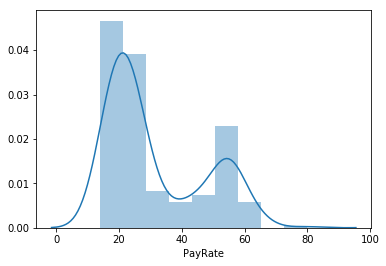

In [50]:
sns.distplot(df2['PayRate']);

In [51]:
#skewness and kurtosis

print("Skewness: %f" % df['PayRate'].skew())
print("Kurtosis: %f" % df['PayRate'].kurt())

Skewness: 0.837191
Kurtosis: -0.748467


In [52]:
#Gender ID and PayRate (hourly) correlation
df2[['GenderID', 'PayRate']].corr()

,GenderID,PayRate
GenderID,1.000000,0.136151
PayRate,0.136151,1.000000


The above output indicates that there is a 13.6% correlation between Gender and Pay rate. 

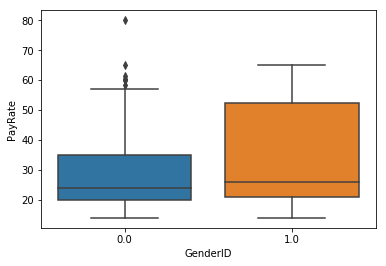

In [53]:
sns.boxplot(x='GenderID', y='PayRate', data = df2)

The above boxplot shows that there is a greater variance of pay for men. While the averages are not too disimilar, women on the whole are paid within a more narrow range. Notably, however, there are only outliers within the female data. Perhaps these are attempts to bring gender pay back in line? 

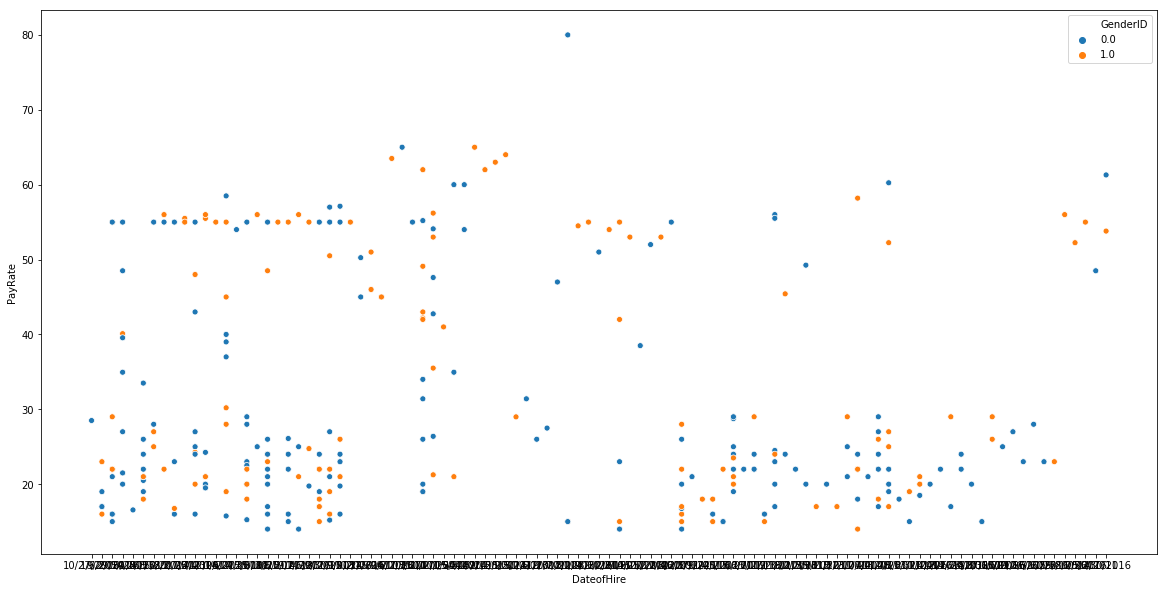

In [54]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(20,10))
sns.scatterplot(x='DateofHire', y='PayRate', hue='GenderID', data=df2)

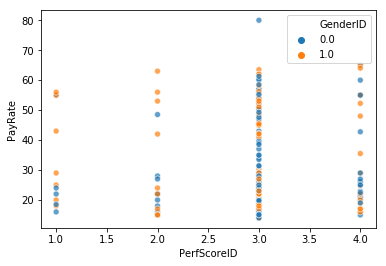

In [55]:
sns.scatterplot(x="PerfScoreID", y="PayRate", hue="GenderID", alpha = 0.7, data = df2)

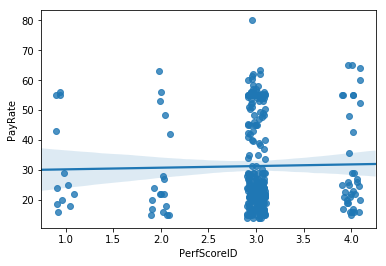

In [56]:
sns.regplot(x="PerfScoreID", y="PayRate", data = df2, x_jitter = 0.1)

Whilst the above is an interesting visualisation, it isn't visibly obvious what the trend may be. From a visual analysis we can interpret that pay rates are distributed across all levels of performance. i.e. Top performers don't initially stand out as ones who are paid more. However, we can also see that the majority of our employees seem to be in the 3.0 score, and are quite evenly distributed across the pay rate. 

Interestingly, in the 1.0 performance score bracket we can see that women are more lowly paid than underperforming men. 

### Understanding the statistical significance of the relationship between Gender and Performance Scores

In [57]:
data_crosstab = pd.crosstab(df2['GenderID'], df2['PerfScoreID'], margins = False)
print(data_crosstab)

PerfScoreID  1.0  2.0  3.0  4.0
GenderID                       
0.0            5    9  142   21
1.0            7    9  101   16


In [58]:
from scipy import stats
stats.chi2_contingency(data_crosstab)

(1.7161155085296884,
 0.633356912743412,
 3,
 array([[  6.85,  10.28, 138.75,  21.13],
        [  5.15,   7.72, 104.25,  15.87]]))

Though a bit ugly, the above output tells me the following:
* Chi Square statistic = 1.716
* Degrees of freedom = 3
* p value of 0.633 

With the above we can deduce that since 0.633 is greater than our significance threshold of 0.05 I must reject the null hypothesis that gender influences performance ratings. 

In the context of a workplace this is positive as it implies that, all else being equal, performance ratings are based on the skill of an individual rather than their gender. 


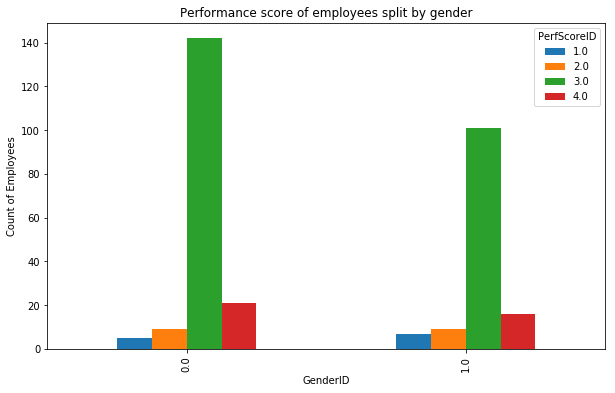

In [59]:
data_crosstab.plot(kind='bar', figsize=(10, 6))

plt.xlabel('GenderID') # add to x-label to the plot
plt.ylabel('Count of Employees') # add y-label to the plot
plt.title('Performance score of employees split by gender') # add title to the plot

plt.show()

The barplot above suggests that there is a similar distribution of men and women across the 4 buckets of performance. 

### RQ1 discussion

The analyses completed above, while by no means exhaustive, give us a good starting ground from which we can develop further investigation. 

In regards to gender and pay, we have found that there is a 13.6% positive correlation between the two attributes. Looking to the boxplot of the data we can understand how this correlation has arisen. We can see that whilst the average pay for each gender is reasonably similar, the spread of the pay rates is significantly larger for men. Considering that the population of men in this sample is also smaller than women, this adds impetus to this finding. Interestingly, though, when examining the spread of female pay we can see that there are significant outliers. Comparatively, all male data stayed within the distribution of the boxplot. 

With one female outlier at the top pay rate of 80, we could ask whether this company has begun to attempt to fix this disparity by raising women's pay? To further investigate this, I plotted the pay data against the date of hire, and made each point coloured based on the gender of the hire. This eliminated the idea that hire paid females were being brought in more recently to address gender disparity. However, the visualisation suggests that there are two main pay brackets within which the firm hires: around 30 and 50. 

In the discussion of gender and performance ratings a chi squared test was utilised as I was comparing two categorical variables. This was a useful test to run so that I could validate my hypothesis of whether gender influenced performance ratings. With a p value greater than my confidence interval of 0.05 we could reject the null hypothesis and thus had to conclude that there was no influence of gender on performance ratings. The bar chart visualisation further confirmed this by reflecting a similar pattern of performance ratings between the two genders.

In all this brief exploration shows that this company is objectively rating its employees based on their performance. However, gender does have an influence in the way that they reward their employees with lower performing men still being payed more than their female counterparts. 




## RQ2: How does the manager influence retention rates?

In [60]:
managerdf=pd.DataFrame(df2[['ManagerID', 'EmpSatisfaction', 'Termd', 'TermReason']])
managerdf.head()
print(managerdf.dtypes)

ManagerID          float64
EmpSatisfaction    float64
Termd              float64
TermReason          object
dtype: object


In [61]:
managerdf['TermReason'].value_counts()

N/A - still employed                196
Another position                     20
unhappy                              14
more money                           11
N/A - Has not started yet            11
hours                                 9
career change                         9
attendance                            7
relocation out of area                5
return to school                      5
military                              4
retiring                              4
performance                           4
maternity leave - did not return      3
no-call, no-show                      3
medical issues                        3
gross misconduct                      1
Name: TermReason, dtype: int64

In [62]:
term_cross = pd.crosstab(managerdf['ManagerID'], managerdf['TermReason'], margins = False)
term_cross.head()

TermReason,Another position,N/A - Has not started yet,N/A - still employed,attendance,career change,gross misconduct,hours,maternity leave - did not return,medical issues,military,more money,"no-call, no-show",performance,relocation out of area,retiring,return to school,unhappy
ManagerID,,,,,,,,,,,,,,,,,
1.0,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2.0,2,0,13,1,1,0,0,0,0,0,0,0,0,0,1,0,1
3.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4.0,1,1,8,0,1,0,2,0,0,0,0,2,2,0,0,0,0
5.0,0,0,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [63]:
term_cross = term_cross.drop(['N/A - still employed'], axis=1)

Text(0.5, 1.0, 'Termination reasons by Manager')

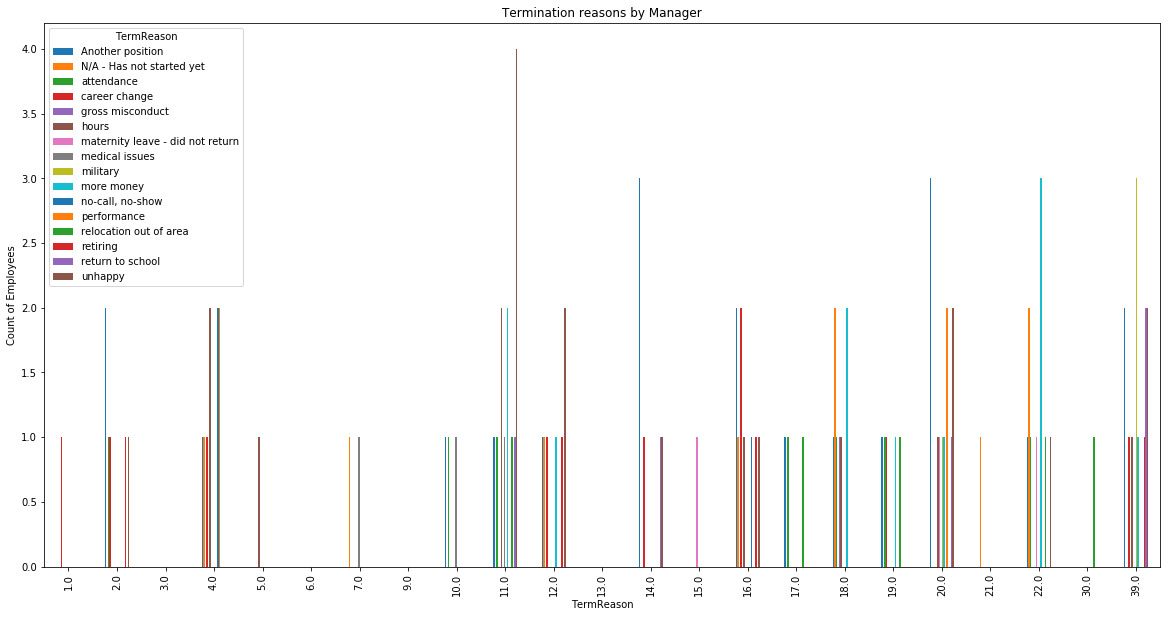

In [64]:
term_cross.plot(kind='bar', width = 0.5, figsize=(20,10))

plt.xlabel('TermReason') # add to x-label to the plot
plt.ylabel('Count of Employees') # add y-label to the plot
plt.title('Termination reasons by Manager') # add title to the plot

This chart is interesting for us to get a more detailed insight for the reasons that employees (sorted by their managers) have left the firm.

We can see that there are roughly three groups of managers: those without any employees leaving, those with one to three employees leaving, and those with more than 3. 

If we delve into the managers with poorer retention we can see that a large number of employees left the firm of their own volition. Examples include: manager 11 with 4 employees leaving as they were unhappy in their roles; managers 20 and 14 with 3 employees each moving onto other roles; and manager 22 who had 3 employees move on for more money. 

Perhaps in the next section we can explore this in more detail by examining the relationship between employee satisfaction, managerID and termination. As these highly prevalent examples suggest, perhaps employee satisfaction could act as a proxy measure for the chances of flight risk.

/opt/conda/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


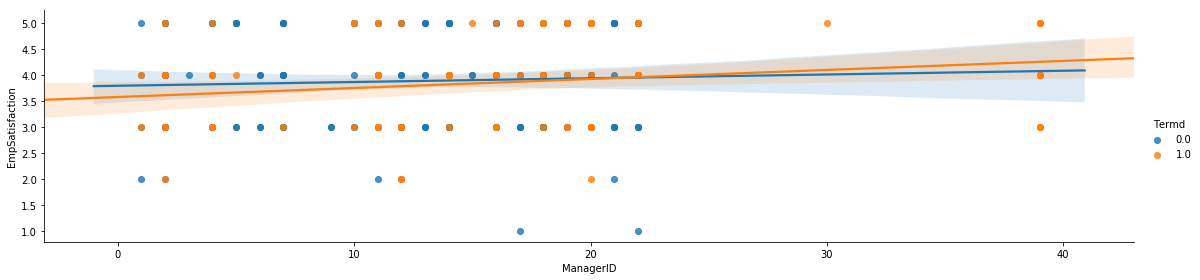

In [65]:
sns.lmplot(x="ManagerID", y="EmpSatisfaction", hue="Termd", data = managerdf, size = 4, aspect=4)

The above plot is useful for us to better understand the relationship between a manager and employee satisfaction as it segments the results into those who left the firm and those who remained. We can infer from the graph that of the terminated employees there was a slight relationship between who their manager was and their satisfaction as an employee. Whilst for employees who are still at the firm, this relationship is almost flat. 

This implies that a manager's impact on their employee's experience has a role to play in whether an individual stays at a firm or not. As indicated earlier, a further follow up to this exploration would be to segment the employees who left on their own behalf and those who were exited to better understand this relationship.

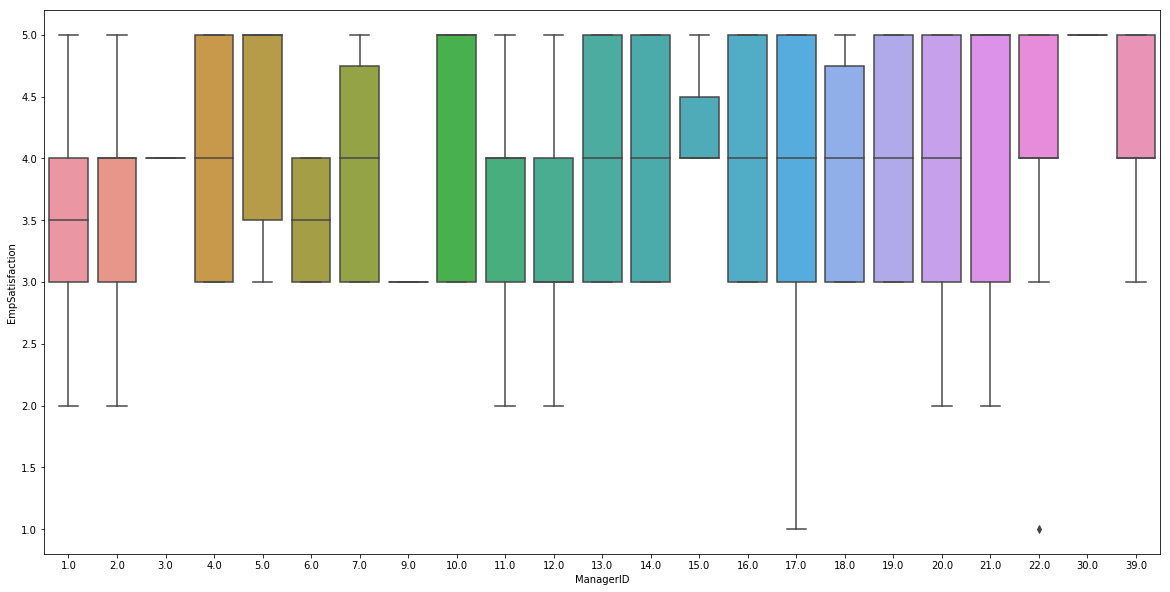

In [66]:
plt.figure(figsize=(20,10))
sns.boxplot(x='ManagerID', y='EmpSatisfaction', data = managerdf)

In [67]:
# explore relationship between satisfaction and termination
manager_crosstab = pd.crosstab(managerdf['EmpSatisfaction'], managerdf['Termd'], margins = False)
print(manager_crosstab)

Termd            0.0  1.0
EmpSatisfaction          
1.0                2    0
2.0                5    4
3.0               75   33
4.0               55   38
5.0               70   28


In [68]:
stats.chi2_contingency(manager_crosstab)

(5.252854514849733, 0.26232283989795396, 4, array([[ 1.34,  0.66],
        [ 6.01,  2.99],
        [72.12, 35.88],
        [62.1 , 30.9 ],
        [65.44, 32.56]]))

The above output tells me the following:
* Chi Square statistic = 5.253
* Degrees of freedom = 4
* p value of 0.262

Because the p value is greater than our confidence interval of 0.05 we can reject the null hypothesis that there is a significant influence on employee satisfaction and termination.

This makes sense as the reasons for termination in this data set are a mixture of both employee driven and employer driven. This would suggest that satisfaction should not always have an impact on whether an employee is terminated. However, it could act as a proxy metric for perception in the workplace as a disgruntled employee may perhaps act in less favourable ways than someone who is enamoured by the company. This could have an impact on their relationships at work, which is an important aspect of a workplace. Further exploration could be undertaken whereby the data is split by employee driven and employer driven causes of termination to more clearly understand the relationship between employee satisfaction and terminations.

In [69]:
managerdf["ManagerID"].fillna("0", inplace = True) 
managerdf["TermReason"].fillna("Another Reason", inplace = True) 
missingval2 = (managerdf.isnull().sum())
print(missingval2[missingval2 > 0])

Series([], dtype: int64)


In [70]:
managerdf['ManagerID'] = managerdf['ManagerID'].astype(int)
print(managerdf.dtypes)

ManagerID            int64
EmpSatisfaction    float64
Termd              float64
TermReason          object
dtype: object


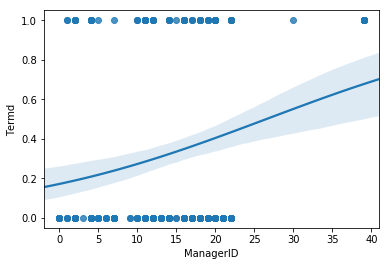

In [71]:
sns.regplot(x="ManagerID", y="Termd", data = managerdf, logistic = True)

In [72]:
plt.title #logistic regression analysis of manager ID and termination

X = np.asarray(managerdf[['ManagerID']])
X[0:5]

y = np.asarray(managerdf['Termd'])
y [0:5]

array([0., 0., 0., 1., 0.])

In [73]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.59],
       [-1.59],
       [-1.59],
       [-1.59],
       [-1.59]])

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (248, 1) (248,)
Test set: (62, 1) (62,)


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
yhat = LR.predict(X_test)
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [77]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.57, 0.43],
       [0.56, 0.44],
       [0.54, 0.46],
       [0.56, 0.44],
       [0.55, 0.45],
       [0.59, 0.41],
       [0.57, 0.43],
       [0.54, 0.46],
       [0.54, 0.46],
       [0.55, 0.45],
       [0.55, 0.45],
       [0.56, 0.44],
       [0.56, 0.44],
       [0.59, 0.41],
       [0.6 , 0.4 ],
       [0.54, 0.46],
       [0.53, 0.47],
       [0.6 , 0.4 ],
       [0.52, 0.48],
       [0.55, 0.45],
       [0.55, 0.45],
       [0.53, 0.47],
       [0.62, 0.38],
       [0.56, 0.44],
       [0.59, 0.41],
       [0.53, 0.47],
       [0.53, 0.47],
       [0.6 , 0.4 ],
       [0.56, 0.44],
       [0.53, 0.47],
       [0.57, 0.43],
       [0.6 , 0.4 ],
       [0.6 , 0.4 ],
       [0.59, 0.41],
       [0.62, 0.38],
       [0.55, 0.45],
       [0.45, 0.55],
       [0.61, 0.39],
       [0.59, 0.41],
       [0.55, 0.45],
       [0.55, 0.45],
       [0.62, 0.38],
       [0.57, 0.43],
       [0.59, 0.41],
       [0.54, 0.46],
       [0.57, 0.43],
       [0.57, 0.43],
       [0.55,

In [78]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.7580645161290323

In [79]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 1 15]
 [ 0 46]]


Confusion matrix, without normalization
[[ 1 15]
 [ 0 46]]


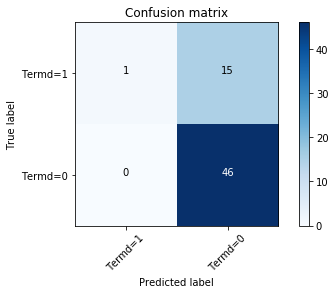

In [80]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Termd=1','Termd=0'],normalize= False,  title='Confusion matrix')

Jacquard test indicates a 75% accuracy of the model.

**Confusion matrix**

Recall = 100%. Out of all the positive classes, how many did we predict correctly?

Precision = 6.25%. Out of all the positive classes we predicted correctly, how many are actually positive?

Accuracy = 75.8% 

F-Score = 2*Recall*Precision/(Recall+Precision) = 0.1176 
     
Low precision and recall - not a very good model.

## RQ2 evaluation

A summary of the exploration above shows: 
* Manager ID has a 20% correlation with termination
* Certain managers are losing employees for non-performance related factors such as a desire for greater pay, unhappiness, and other opportunities. These factors clustered around specific managers and were not spread across the firm. In conjunction with the 20% correlation statistic we can infer that the culture managers engender at work do play a part in retention risks. 
* Using Employee satisfaction as a proxy metric to explore the above in greater detail showed a slight correlation in the regplot. However, because the data was not split between employee led terminations and employer led terminations, the results are clouded as the two are not both linked to employee satisfaction. Further, it should be considered that employee satisfaction is self-reported and could be inaccurate due to a fear of retaliation. 
* The logistic regression model built had a low F-score of 0.1176. Whilst a reasonably high accuracy of 75% was reported, the precision of the model was not good. This can be inferred to again be an impact of the amalgamation of termination reasons cancelling out the signal of each other. 

In conclusion, this exploration has shown that managers at this firm can influence whether employees stay or leave. However, the statistical and analytical exploration of this data would have benefitted from a further segmentation of the termination reasons to explore the causes of employee led terminations. 